# ENCARGO UNIDAD 1




---


* Nombre: María José Namuche Bustamante


# Sección 1 - Análisis exploratorio


A continuación, tendrás que interpretar la información de un dataset en Python.


---

Comencemos con un clásico dentro del mundo de data science. Trabajaremos con **Iris**. Un dataset muy conocido en la academia, que sirve bastante para comenzar dentro del mundo del Data Science. 
Antes de comenzar, demos contexto a todo esto. Iris es un dataset que nos permite clasificar flores a partir de características que poseen las plantas.

Las características o features son las siguientes:

* sepal lenght o largo del sépalo en cm,

* sepal width o ancho del sépalo en cm,

* petal lenth o largo del pétalo en cm,

* petal width o ancho del pétalo en cm.


Las diferentes especies a las que puede pertenecer una planta son:

*   Setosa
*   Virginica
*   Versicolor

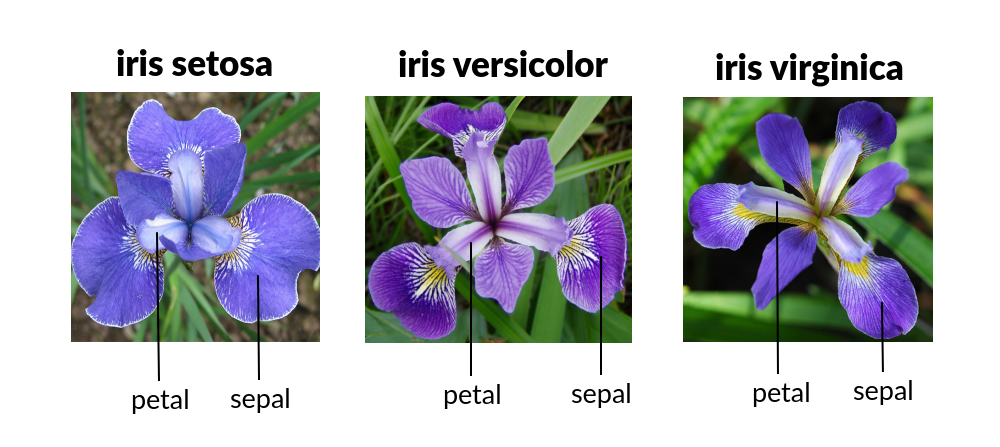

In [2]:
#Cargamos las librerías de Python que nos servirán para todo esto
import numpy as np
import pandas as pd
import sklearn as skl
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import cm
plt.rcParams['figure.figsize']=(16,9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [3]:
#Cargamos el dataset de Iris para comenzar a trabajarlo

#Puedes cargarlo desde la librería Scikit-learn
from sklearn.datasets import load_iris

data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data['target']

### Instrucciones iniciales de python 

In [4]:
#Utilice el comando head
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Añadir qué observaciones hay respecto del comando utilizado

Con head() se muestran los primeros registros de cada columna del dataframe.

Se puede observar que por ejemplo el primer registro (registro 0) de cada columna es:
* sepal legth (cm): 5.1
* sepal width (cm): 3.5
* petal length (cm): 1.4
* petal width (cm) 0.2

Y que los 5 primeros registros del data frame tienen como target 0 que representa que son flroes Iris Setosa.

In [5]:
#Utilice tail
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


Añadir qué observaciones hay respecto del comando utilizado

Con tail() se muestran los últimos registros de cada columna del dataframe.

Se puede observar que por ejemplo el último registro (registro 149) de cada columna es:
* sepal legth (cm): 6.7
* sepal width (cm): 3.0
* petal length (cm): 5.2
* petal width (cm) 2.3

Y que los 5 últimos registros del data frame tienen como target 2 que representa que son flroes Iris Versicolor.

In [18]:
#Utilice sample 
df.sample()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
26,5.0,3.4,1.6,0.4,0


Añadir qué observaciones hay respecto del comando utilizado

Con sample() se muestran un registro de orden aleatorio para cada columna del dataframe.

Se puede observar que por ejemplo el registro 26 de cada columna es:
* sepal legth (cm): 5.0
* sepal width (cm): 3.4
* petal length (cm): 1.6
* petal width (cm) 0.4
* target: 0

Al volver a correr esta línea de código se mostraría otro registro de orden aleatorio.

In [8]:
#utilice columns
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

Añadir qué observaciones hay respecto del comando utilizado

Con este comando se puede obtener una lista con los nombre de cada columna del dataframe.

In [10]:
#Utilice mean, mode and median
df.mean()

sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
target               1.000000
dtype: float64

In [22]:
df.mode()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.0,3.0,1.4,0.2,0
1,NaN,NaN,1.5,NaN,1
2,NaN,NaN,NaN,NaN,2


In [13]:
df.median()

sepal length (cm)    5.80
sepal width (cm)     3.00
petal length (cm)    4.35
petal width (cm)     1.30
target               1.00
dtype: float64

Añadir qué observaciones hay respecto del comando utilizado

El comando mean() me da el promedio de todos los registros para cada columna.

El comando mode() indica la moda de los registros para cada columna. Es curioso que aparezca NA siendo que no hay ningún registro valor nulo. Esto puede darse por que todos los valores de los registros se presenten la misma cantidad de veces o que la moda de esa columna sea multimodal.

El comando median() me dice la mediana de entre todos los registros para cada columna. En otras palabras, me está indicando el valor del promedio de los registros 74 y 75 al tener un total de 150 registros enumerados del 0 al 149.

In [28]:
#Utilizamos value_counts()
df.value_counts()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  target
5.8                2.7               5.1                1.9               2         2
7.9                3.8               6.4                2.0               2         1
5.4                3.0               4.5                1.5               1         1
5.5                2.4               3.7                1.0               1         1
                   2.3               4.0                1.3               1         1
                                                                                   ..
6.3                2.5               4.9                1.5               1         1
                   2.3               4.4                1.3               1         1
6.2                3.4               5.4                2.3               2         1
                   2.9               4.3                1.3               1         1
4.3                3.0               1.1                0.1

Añadir qué observaciones hay respecto del comando utilizado


In [19]:
#Utilizamos describe()
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


Añadir qué observaciones hay respecto del comando utilizado

Interpretación considerando la columna petal legth:
- Hay 150 valores en la columna
- El promedio es 3.758 cm
- La desviación estándar es 1.765298
- El valor mínimo es 1 cm
- El 25% de las observaciones son menores a 1.6
- El 50% de las observaciones son menores a 4.35
- El 75% de las observaciones son menores a 5.1
- El valor máximo es 6.9 cm

In [20]:
#Utilizamos info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


### Gráficos
Plantear algunos gráficos que le ayuden a explorar de mejor manera y genérelos con su respectivo análisis

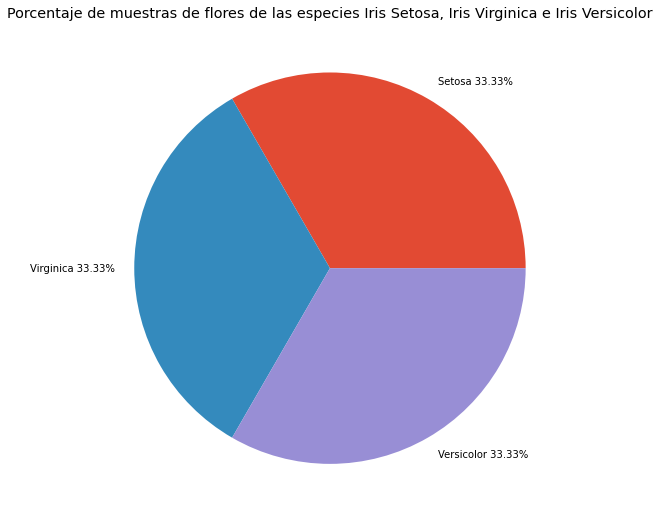

In [26]:
clases = np.array([df[df.target == 0.0].shape[0], df[df.target == 1.0].shape[0], df[df.target == 2.0].shape[0]])

labels = [ str(round(x * 1.0 / clases.sum() * 100.0, 2)) + '%'  for x in clases ]
labels[0] = 'Setosa ' + labels[0]
labels[1] = 'Virginica ' + labels[1]
labels[2] = 'Versicolor ' + labels[2]

plt.pie(clases, labels=labels)
plt.title('Porcentaje de muestras de flores de las especies Iris Setosa, Iris Virginica e Iris Versicolor')
plt.show()

Se puede observar que hay una distribución aceptable de muestras de Iris Setosa, Iris Virginica e Iris Versicolor. Además se cuenta con la misma cantidad de ejemplos para cada tipo de flor.

C:\Users\luisn\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


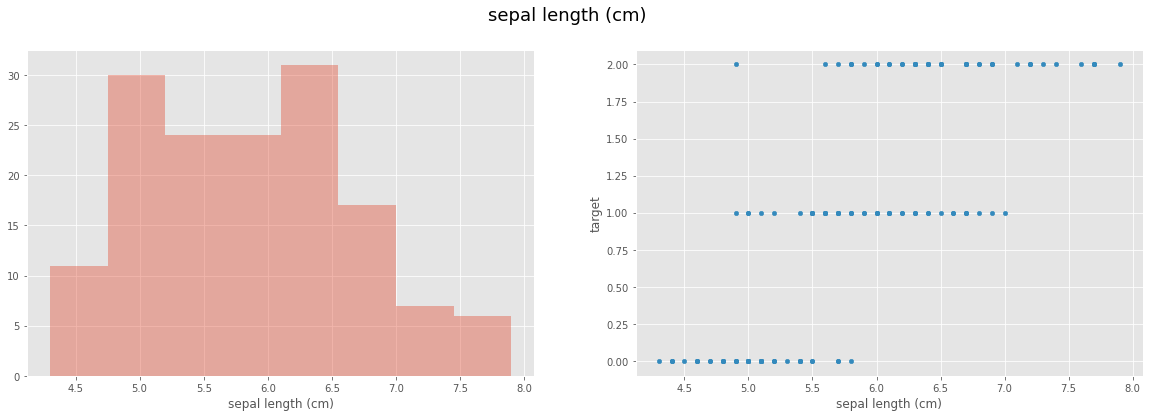

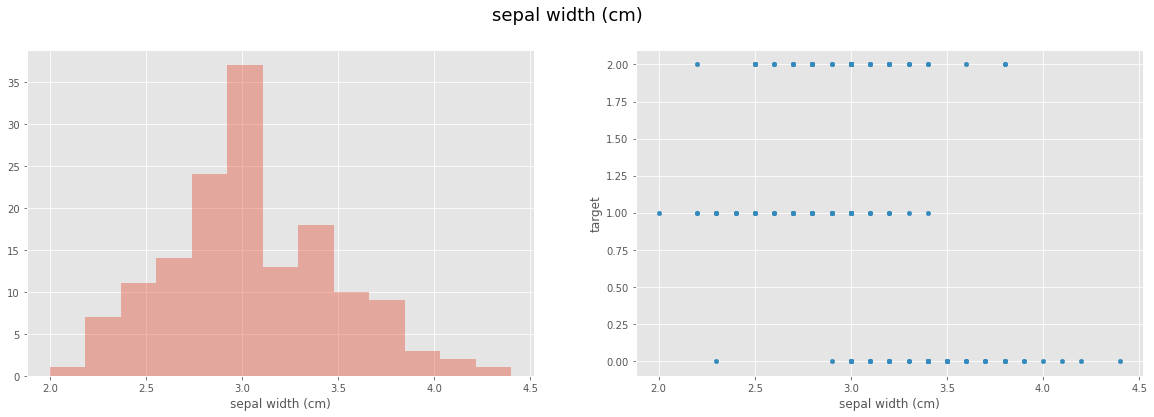

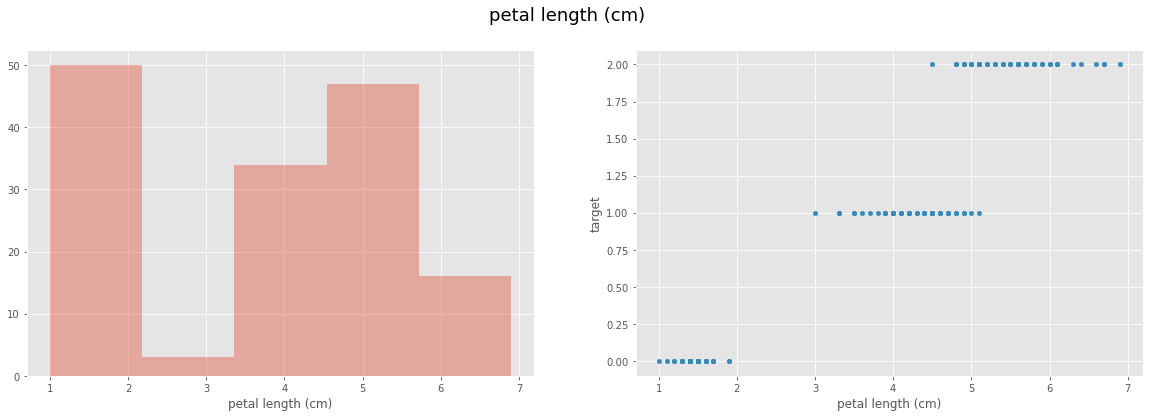

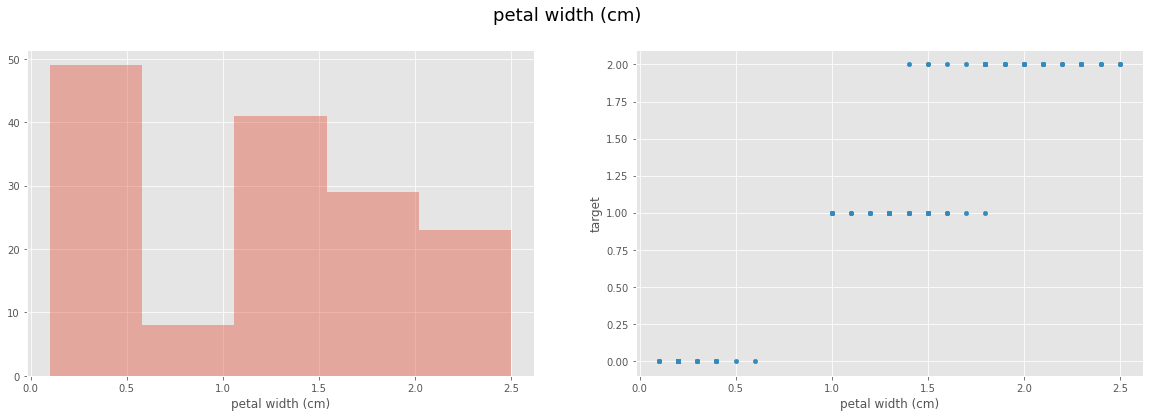

In [27]:
columnas = np.array(df.columns)

for col in columnas[:-1]:
    fig, ax =plt.subplots(1, 2, figsize=(20, 6))
    fig.suptitle(col, fontsize=18)
    sb.distplot(df[col], ax=ax[0], kde=False)
    df[[col]+['target']].plot.scatter(x=col, y='target', ax=ax[1])
    plt.show()

In [8]:
X = df.drop(["target"],axis=1)

y = df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 29)

modelo = DecisionTreeClassifier(random_state=29)

modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)

print('Precisión del modelo:', modelo.score(X_test, y_test))
print('Accuracy del modelo:', accuracy_score(y_test, y_pred))

Precisión del modelo: 0.9
Accuracy del modelo: 0.9


Profundidad del árbol: 5
Número de nodos terminales: 6


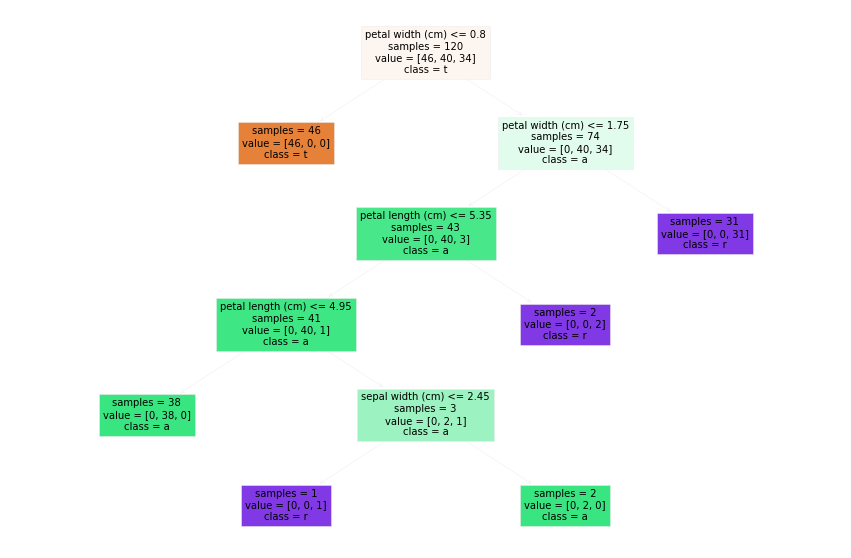

In [23]:
fig, ax = plt.subplots(figsize=(15,10))

print(f"Profundidad del árbol: {modelo.get_depth()}")
print(f"Número de nodos terminales: {modelo.get_n_leaves()}")

plot = plot_tree(
            decision_tree = modelo,
            feature_names = df.drop(columns = ["target"]).columns,
            class_names   = 'target',
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )

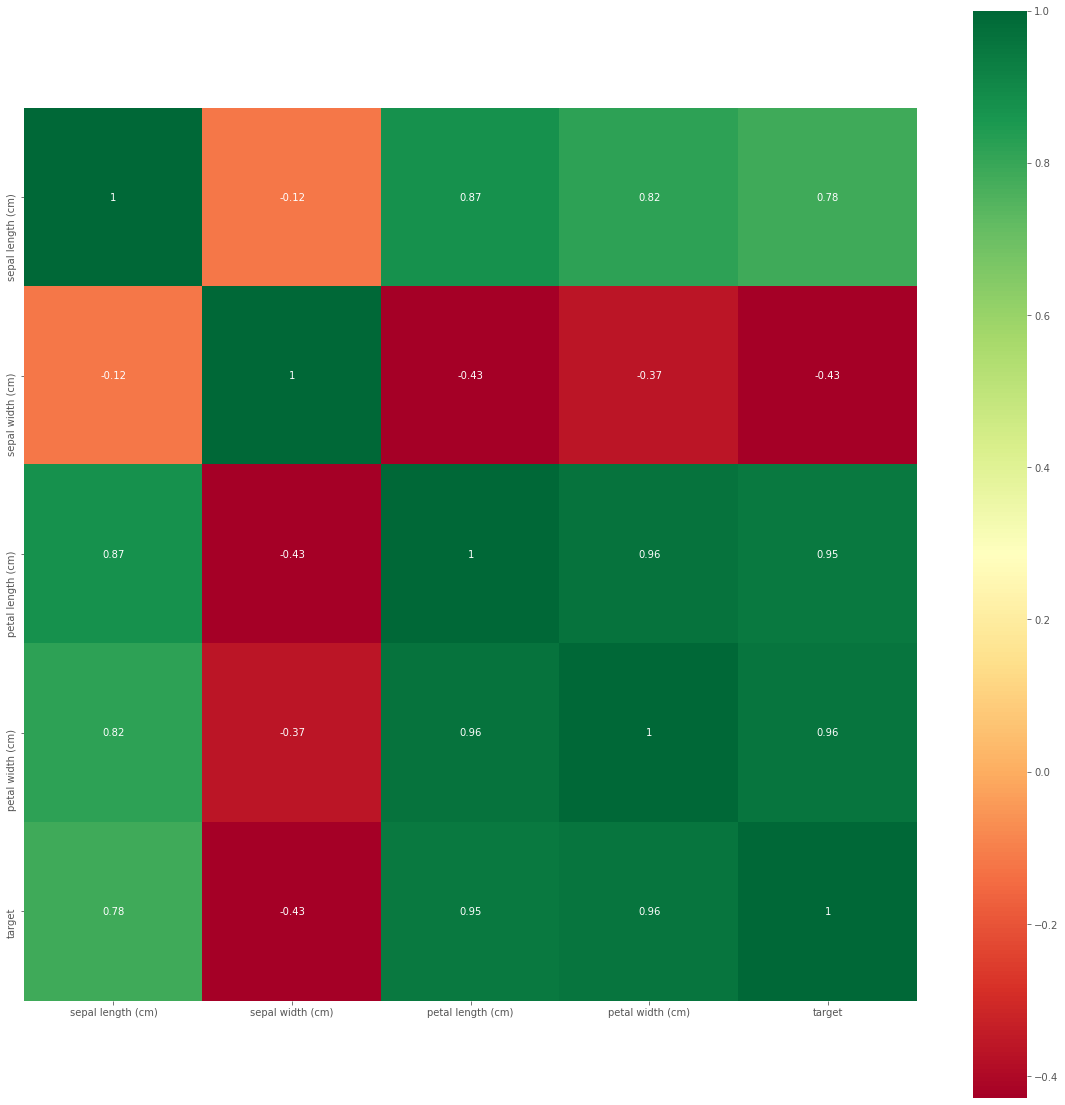

In [32]:
plt.figure(figsize=(20,20))
p = sb.heatmap(df.corr(method='pearson'), annot=True, cmap='RdYlGn', square=True)

### Responder 
Conteste las siguientes preguntas respecto al dataset explorado

A. ¿Cuál es la cantidad de registros que tiene el dataset?

R: El dataset tiene 150 registros


B. ¿Cuál es el promedio de los anchos y los largos de pétalo que hay en la muestra?

R: Promedio de los anchos de pétalo que hay en la muestra: 1.19933 cm
   Promedio de los largos de pétalo que hay en la muestra: 3.75800 cm

C. ¿Hay registros nulls dentro de la data? ¿Cómo se dió cuenta?

R: No existen registros nulls dentro de la data. Esto se puede verificar al utilizar info() que especifica que en todas las columnas hay 150 registros no nulos y como la cantidad de registros es 150, se puede concluir que no hay ningún registro null.

D. En Machine Learning se habla mucho de aprendizaje supervisado y no supervisado. Uno tiene etiqueta y el otro no tiene etiqueta respectivamente. ¿Qué tipo de aprendizaje cree que correspondería utilizar? ¿Por qué?

R: Creo que correspondería utilizar el aprendizaje supervisado debido a que se trata de una clasificación para conocer qué tipo de flor es. Además tener una etiqueta durante el entrenamiento ayudaría a obtener mejores predicciones.

E. ¿Cómo están distribuídos los datos dentro de la muestra respecto de las especies?. En caso de tener más ejemplos de un tipo de flor, y menos de otro tipo ¿crees que influiría en el algoritmo final? ¿por qué?

R: En la data se tiene 50 (33.3%) registros para cada tipo de flor.

Creo que sí podría influir en la data. Sobretodo al obtener la descripción con el comando describe() además el algoritmo final podría verse influenciado a dar como el resultado al tipo de flor del que se tiene más ejemplo.

F. ¿Qué procesamiento podríamos hacer como rutina de limpieza?. Propone 3 acciones que se podrían efectuar a este dataset.

R: Se podría elimiar los registros, o completar con el promedio de los datos de esa columna es caso hubieran valores nulos o faltantes. También se podría reducir la muestra en algunos casos debido a valores atípicos.

In [38]:
for feature in df.columns:
    print('Valores nulos de', feature, ':', df[feature].isna().sum())

Valores nulos de sepal length (cm) : 0
Valores nulos de sepal width (cm) : 0
Valores nulos de petal length (cm) : 0
Valores nulos de petal width (cm) : 0
Valores nulos de target : 0


G. Ingresa 3 descubrimientos adicionales a los ya contestados anteriormente, que complementen el análisis exploratorio que acabas de realizar sobre los datos.

R: Gracias a los histogramas, se puede ver que la distribución de los registros para cada columna no es acampanada.

Las variable 'sepal length (cm)', 'petal length (cm)' y 'petal width (cm)' tienen una correlación con 'target' de 0.78, 0.95 y 0.96 respectivamente. Mientras que la variable 'sepal width (cm)' tiene una correlación negativa con 'target' de -0.43.

La precisión del modelo utilizando todas las variables es de 0.9

# Sección 2 - Preprocesamiento

Sobre el data ser Placement_Data_Full_Class.csv (Disponible en el repositorio) deberás plantear una rutina de limpieza de los datos y ejecutar esta rutina.

Recuerda utilizar manejo de Missing Values, outliers, distribuciones, estadísticos, etc. Y a través de esto, ejecuta una rutina de limpieza y preprocesamiento utilizando los métodos vistos en la sesión.

¿Qué características te parece que son las más importantes? ¿Cuales no son significativas para la predicción de los salarios? ¿Descartarías alguna característica en particular utilizando la lógica o la intuición? ¿Por qué la/s descartaría/s?

Para entender mejor el set de datos, se detalla a continuación lo que representa cada valor:

- sl_no: Serial Number - número de serie y del tipo entero

- gender: valor categórico que corresponde al género y toma los valores F o M

- ssc_p: puntaje de educación secundaria 10mo grado (%) 

- ssc_b: junta de educación secundaria (central/otros) 

- hsc_p: puntaje(%) de educación secundaria superior 12vo grado 

- hsc_b: junta de educación superior (central/otros) 

- hsc_s: especialización en educación secundaria superior 

- degree_p: puntaje(%) de graduación 

- degree_t: tipo de titulo - registro de graduación 

- workex: Experiencia laboral 

- etest_p: puntaje obtenido en la prueba de especialidad (%) 

- specialisation: postgrado, especialización 

- mba_p: (puntaje %) MBA 

- status: estado de colocación colocado/no colocado 

- salary: salario ofrecido por la empresa a los candidatos

In [384]:
data_frame = pd.read_csv("Placement_Data_Full_Class.csv")
data_frame.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [385]:
data_frame.shape

(215, 15)

Verifico la existencia de valores nulos en las columnas

In [386]:
for feature in data_frame.columns:
    print('Valores nulos de', feature, ':', data_frame[feature].isna().sum())

Valores nulos de sl_no : 0
Valores nulos de gender : 0
Valores nulos de ssc_p : 0
Valores nulos de ssc_b : 0
Valores nulos de hsc_p : 0
Valores nulos de hsc_b : 0
Valores nulos de hsc_s : 0
Valores nulos de degree_p : 0
Valores nulos de degree_t : 0
Valores nulos de workex : 0
Valores nulos de etest_p : 0
Valores nulos de specialisation : 0
Valores nulos de mba_p : 0
Valores nulos de status : 0
Valores nulos de salary : 67


Se puede ver que existen 67 valores nulos en la columna de salarios, podría eliminarlos pero me quedaría solo con 148 observaciones, entonces voy a optar por reemplazarlos con el promedio.

In [387]:
#Imputación
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean', verbose=0)
imputer = imputer.fit(data_frame[['salary']])
data_frame[['salary']] = imputer.transform(data_frame[['salary']])

In [388]:
data_frame

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.000000
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.000000
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.000000
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,288655.405405
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.000000
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.000000
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.000000
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.000000


In [389]:
data_frame.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,77457.900102
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,250000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,288655.405405
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,288655.405405
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


<function matplotlib.pyplot.show(close=None, block=None)>

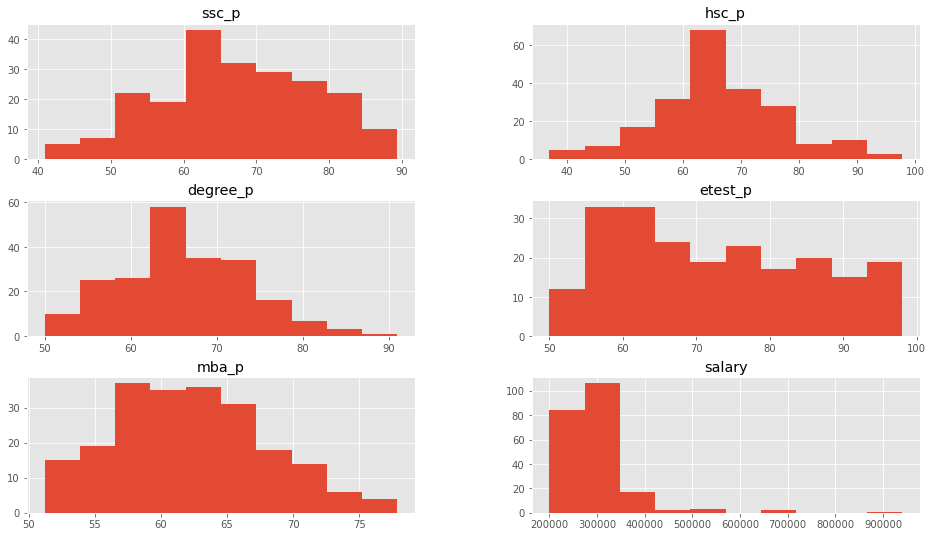

In [390]:
data_frame.drop(['sl_no', 'gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation', 'status'],1).hist()
plt.show

In [391]:
# Veo también las estadísticas de las columnas tipo object
data_frame.describe(include=[np.object])

,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
count,215,215,215,215,215,215,215,215
unique,2,2,2,3,3,2,2,2
top,M,Central,Others,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
freq,139,116,131,113,145,141,120,148


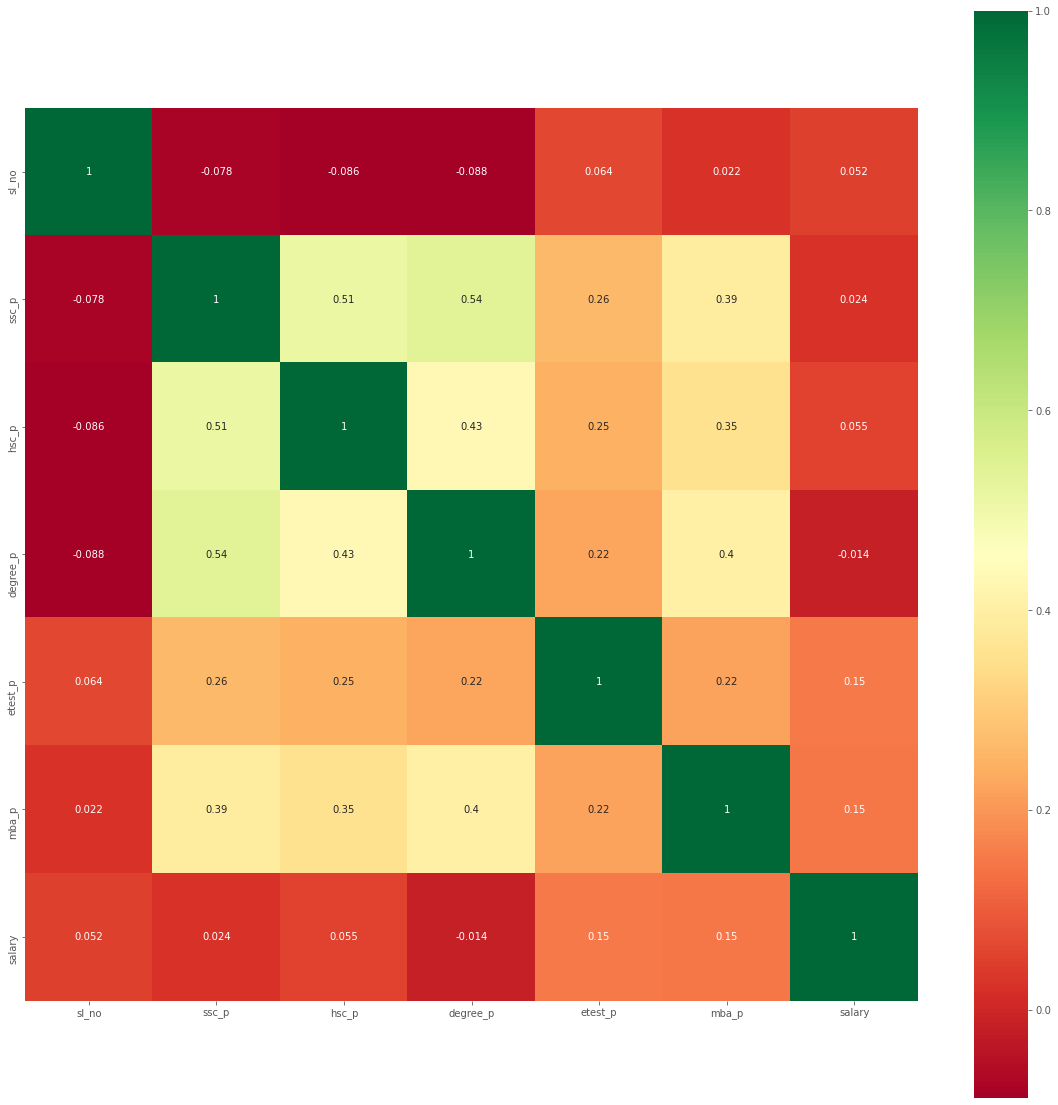

In [392]:
plt.figure(figsize=(20,20))
p = sb.heatmap(data_frame.corr(method='pearson'), annot=True, cmap='RdYlGn', square=True)

Elimino la columna sl_no por ser una columna que no aporta valor pues solo es el número de serie

In [393]:
eliminar = ['sl_no']
data_frame = data_frame.drop(eliminar, axis = 'columns')
data_frame.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.000000
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.000000
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.000000
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,288655.405405
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.000000


Defino las variables dependientes e independiente

In [395]:
X = data_frame.iloc[:,0:-1].values
Y = data_frame.iloc[:,-1].values

En X quedan 13 columnas: gender, ssc_p, ssc_b, hsc_p, hsc_b, hsc_s, degree_p, degree_t, workex, etest_p, specialisation, mba_p, status

In [396]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,M,67,Others,91,Others,Commerce,58,Sci&Tech,No,55,Mkt&HR,58.8,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65,Central,68,Central,Arts,64,Comm&Mgmt,No,75,Mkt&Fin,57.8,Placed
3,M,56,Central,52,Central,Science,52,Sci&Tech,No,66,Mkt&HR,59.43,Not Placed
4,M,85.8,Central,73.6,Central,Commerce,73.3,Comm&Mgmt,No,96.8,Mkt&Fin,55.5,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.6,Others,82,Others,Commerce,77.6,Comm&Mgmt,No,91,Mkt&Fin,74.49,Placed
211,M,58,Others,60,Others,Science,72,Sci&Tech,No,74,Mkt&Fin,53.62,Placed
212,M,67,Others,67,Others,Commerce,73,Comm&Mgmt,Yes,59,Mkt&Fin,69.72,Placed
213,F,74,Others,66,Others,Commerce,58,Comm&Mgmt,No,70,Mkt&HR,60.23,Placed


En Y queda la columna de salario.

In [397]:
pd.DataFrame(Y)

,0
0,270000.000000
1,200000.000000
2,250000.000000
3,288655.405405
4,425000.000000
...,...
210,400000.000000
211,275000.000000
212,295000.000000
213,204000.000000


Aplico la transformación a la columna de género, quedando con valores 0 y 1 representando a Female y Male respectivamente.

In [398]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 0] = le.fit_transform(X[:, 0])
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1,67,Others,91,Others,Commerce,58,Sci&Tech,No,55,Mkt&HR,58.8,Placed
1,1,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,1,65,Central,68,Central,Arts,64,Comm&Mgmt,No,75,Mkt&Fin,57.8,Placed
3,1,56,Central,52,Central,Science,52,Sci&Tech,No,66,Mkt&HR,59.43,Not Placed
4,1,85.8,Central,73.6,Central,Commerce,73.3,Comm&Mgmt,No,96.8,Mkt&Fin,55.5,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,80.6,Others,82,Others,Commerce,77.6,Comm&Mgmt,No,91,Mkt&Fin,74.49,Placed
211,1,58,Others,60,Others,Science,72,Sci&Tech,No,74,Mkt&Fin,53.62,Placed
212,1,67,Others,67,Others,Commerce,73,Comm&Mgmt,Yes,59,Mkt&Fin,69.72,Placed
213,0,74,Others,66,Others,Commerce,58,Comm&Mgmt,No,70,Mkt&HR,60.23,Placed


También aplico la transformación a la columna de ssc_b, quedando con valores 0 y 1 representando a Central y Others respectivamente.

In [399]:
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1,67,1,91,Others,Commerce,58,Sci&Tech,No,55,Mkt&HR,58.8,Placed
1,1,79.33,0,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,1,65,0,68,Central,Arts,64,Comm&Mgmt,No,75,Mkt&Fin,57.8,Placed
3,1,56,0,52,Central,Science,52,Sci&Tech,No,66,Mkt&HR,59.43,Not Placed
4,1,85.8,0,73.6,Central,Commerce,73.3,Comm&Mgmt,No,96.8,Mkt&Fin,55.5,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,80.6,1,82,Others,Commerce,77.6,Comm&Mgmt,No,91,Mkt&Fin,74.49,Placed
211,1,58,1,60,Others,Science,72,Sci&Tech,No,74,Mkt&Fin,53.62,Placed
212,1,67,1,67,Others,Commerce,73,Comm&Mgmt,Yes,59,Mkt&Fin,69.72,Placed
213,0,74,1,66,Others,Commerce,58,Comm&Mgmt,No,70,Mkt&HR,60.23,Placed


De la misma manera aplico la transformación a la columna de hsc_b, quedando con valores 0 y 1 representando a Central y Others respectivamente.

In [400]:
le = LabelEncoder()
X[:, 4] = le.fit_transform(X[:, 4])
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1,67,1,91,1,Commerce,58,Sci&Tech,No,55,Mkt&HR,58.8,Placed
1,1,79.33,0,78.33,1,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,1,65,0,68,0,Arts,64,Comm&Mgmt,No,75,Mkt&Fin,57.8,Placed
3,1,56,0,52,0,Science,52,Sci&Tech,No,66,Mkt&HR,59.43,Not Placed
4,1,85.8,0,73.6,0,Commerce,73.3,Comm&Mgmt,No,96.8,Mkt&Fin,55.5,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,80.6,1,82,1,Commerce,77.6,Comm&Mgmt,No,91,Mkt&Fin,74.49,Placed
211,1,58,1,60,1,Science,72,Sci&Tech,No,74,Mkt&Fin,53.62,Placed
212,1,67,1,67,1,Commerce,73,Comm&Mgmt,Yes,59,Mkt&Fin,69.72,Placed
213,0,74,1,66,1,Commerce,58,Comm&Mgmt,No,70,Mkt&HR,60.23,Placed


Ahora aplico la transformación a la columna de workex, quedando con valores 0 y 1 representando a No y Yes respectivamente.

In [401]:
le = LabelEncoder()
X[:, 8] = le.fit_transform(X[:, 8])
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1,67,1,91,1,Commerce,58,Sci&Tech,0,55,Mkt&HR,58.8,Placed
1,1,79.33,0,78.33,1,Science,77.48,Sci&Tech,1,86.5,Mkt&Fin,66.28,Placed
2,1,65,0,68,0,Arts,64,Comm&Mgmt,0,75,Mkt&Fin,57.8,Placed
3,1,56,0,52,0,Science,52,Sci&Tech,0,66,Mkt&HR,59.43,Not Placed
4,1,85.8,0,73.6,0,Commerce,73.3,Comm&Mgmt,0,96.8,Mkt&Fin,55.5,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,80.6,1,82,1,Commerce,77.6,Comm&Mgmt,0,91,Mkt&Fin,74.49,Placed
211,1,58,1,60,1,Science,72,Sci&Tech,0,74,Mkt&Fin,53.62,Placed
212,1,67,1,67,1,Commerce,73,Comm&Mgmt,1,59,Mkt&Fin,69.72,Placed
213,0,74,1,66,1,Commerce,58,Comm&Mgmt,0,70,Mkt&HR,60.23,Placed


En la transformación a la colummna status, queda con valores 0 y 1 representando a Not Placed y Placed respectivamente

In [402]:
le = LabelEncoder()
X[:, 12] = le.fit_transform(X[:, 12])
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1,67,1,91,1,Commerce,58,Sci&Tech,0,55,Mkt&HR,58.8,1
1,1,79.33,0,78.33,1,Science,77.48,Sci&Tech,1,86.5,Mkt&Fin,66.28,1
2,1,65,0,68,0,Arts,64,Comm&Mgmt,0,75,Mkt&Fin,57.8,1
3,1,56,0,52,0,Science,52,Sci&Tech,0,66,Mkt&HR,59.43,0
4,1,85.8,0,73.6,0,Commerce,73.3,Comm&Mgmt,0,96.8,Mkt&Fin,55.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,80.6,1,82,1,Commerce,77.6,Comm&Mgmt,0,91,Mkt&Fin,74.49,1
211,1,58,1,60,1,Science,72,Sci&Tech,0,74,Mkt&Fin,53.62,1
212,1,67,1,67,1,Commerce,73,Comm&Mgmt,1,59,Mkt&Fin,69.72,1
213,0,74,1,66,1,Commerce,58,Comm&Mgmt,0,70,Mkt&HR,60.23,1


Para la columna hsc_s primero verifico cuántos valores únicos existen.

In [403]:
pd.DataFrame(X)[5].unique()

array(['Commerce', 'Science', 'Arts'], dtype=object)

Como son 3 valores únicos, agregaré 3 columnas (una por cada valor origninal) para identificar su ausencia (0) o presencia (1).

In [404]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [5])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0,1,0,1,67,1,91,1,58,Sci&Tech,0,55,Mkt&HR,58.8,1
1,0,0,1,1,79.33,0,78.33,1,77.48,Sci&Tech,1,86.5,Mkt&Fin,66.28,1
2,1,0,0,1,65,0,68,0,64,Comm&Mgmt,0,75,Mkt&Fin,57.8,1
3,0,0,1,1,56,0,52,0,52,Sci&Tech,0,66,Mkt&HR,59.43,0
4,0,1,0,1,85.8,0,73.6,0,73.3,Comm&Mgmt,0,96.8,Mkt&Fin,55.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,0,1,0,1,80.6,1,82,1,77.6,Comm&Mgmt,0,91,Mkt&Fin,74.49,1
211,0,0,1,1,58,1,60,1,72,Sci&Tech,0,74,Mkt&Fin,53.62,1
212,0,1,0,1,67,1,67,1,73,Comm&Mgmt,1,59,Mkt&Fin,69.72,1
213,0,1,0,0,74,1,66,1,58,Comm&Mgmt,0,70,Mkt&HR,60.23,1


Se elimina la columna 5 y en su lugar se agregan las 3 nuevas columnas en la posición 0, 1 y 2 para "Arts", "Commerce" y "Science" respectivamente

Realizo el mismo procedimiento para la columna 9 con los valores de degree_t

In [405]:
pd.DataFrame(X)[9].unique()

array(['Sci&Tech', 'Comm&Mgmt', 'Others'], dtype=object)

In [406]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [9])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0,0,1,0,1,0,1,67,1,91,1,58,0,55,Mkt&HR,58.8,1
1,0,0,1,0,0,1,1,79.33,0,78.33,1,77.48,1,86.5,Mkt&Fin,66.28,1
2,1,0,0,1,0,0,1,65,0,68,0,64,0,75,Mkt&Fin,57.8,1
3,0,0,1,0,0,1,1,56,0,52,0,52,0,66,Mkt&HR,59.43,0
4,1,0,0,0,1,0,1,85.8,0,73.6,0,73.3,0,96.8,Mkt&Fin,55.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,0,0,0,1,0,1,80.6,1,82,1,77.6,0,91,Mkt&Fin,74.49,1
211,0,0,1,0,0,1,1,58,1,60,1,72,0,74,Mkt&Fin,53.62,1
212,1,0,0,0,1,0,1,67,1,67,1,73,1,59,Mkt&Fin,69.72,1
213,1,0,0,0,1,0,0,74,1,66,1,58,0,70,Mkt&HR,60.23,1


Se elimina la columna 9 y en su lugar se agregan las 3 nuevas columnas en la posición 0, 1 y 2 para "Comm&Mgmt", "Others" y "Sci&Tech" respectivamente. Desplazando a "Arts", "Commerce" y "Science" a la posición 3, 4 y 5 respectivamente.

También realizo el mismo procedimiento para la columna 14 con los valores de specialisation

In [407]:
pd.DataFrame(X)[14].unique()

array(['Mkt&HR', 'Mkt&Fin'], dtype=object)

Como solo son 2 valores únicos, utilizaré la transformación de 0 a 1 para Mkt&Fin y MKT&RH en su misma columna.

In [408]:
le = LabelEncoder()
X[:, 14] = le.fit_transform(X[:, 14])
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0,0,1,0,1,0,1,67,1,91,1,58,0,55,1,58.8,1
1,0,0,1,0,0,1,1,79.33,0,78.33,1,77.48,1,86.5,0,66.28,1
2,1,0,0,1,0,0,1,65,0,68,0,64,0,75,0,57.8,1
3,0,0,1,0,0,1,1,56,0,52,0,52,0,66,1,59.43,0
4,1,0,0,0,1,0,1,85.8,0,73.6,0,73.3,0,96.8,0,55.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,0,0,0,1,0,1,80.6,1,82,1,77.6,0,91,0,74.49,1
211,0,0,1,0,0,1,1,58,1,60,1,72,0,74,0,53.62,1
212,1,0,0,0,1,0,1,67,1,67,1,73,1,59,0,69.72,1
213,1,0,0,0,1,0,0,74,1,66,1,58,0,70,1,60.23,1


El siguiente paso a realizar sería el escalado y la normalización

In [298]:
from sklearn.preprocessing import MinMaxScaler
escalador = MinMaxScaler()

scaled_data = escalador.fit_transform(X)
pd.DataFrame(scaled_data).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.538240,1.0,0.889621,1.0,0.195122,0.0,0.104167,1.0,0.284483,1.0
1,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.792414,0.0,0.680890,1.0,0.670244,1.0,0.760417,0.0,0.564843,1.0
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.497011,0.0,0.510708,0.0,0.341463,0.0,0.520833,0.0,0.247001,1.0
3,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.311482,0.0,0.247117,0.0,0.048780,0.0,0.333333,1.0,0.308096,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.925788,0.0,0.602965,0.0,0.568293,0.0,0.975000,0.0,0.160795,1.0


Compruebo la normalización

In [299]:
pd.DataFrame(scaled_data).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,0.674419,0.051163,0.274419,0.051163,0.525581,0.423256,0.646512,0.544494,0.460465,0.483248,0.609302,0.399273,0.344186,0.460428,0.441860,0.414850,0.688372
std,0.469685,0.220844,0.447262,0.220844,0.500510,0.495228,0.479168,0.223195,0.499598,0.179531,0.489045,0.179482,0.476211,0.276582,0.497767,0.218643,0.464240
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.406308,0.000000,0.393740,0.000000,0.268293,0.000000,0.208333,0.000000,0.252436,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.538240,0.000000,0.461285,1.000000,0.390244,0.000000,0.437500,0.000000,0.404423,1.000000
75%,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.717584,1.000000,0.593081,1.000000,0.536585,1.000000,0.697917,1.000000,0.563906,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Guardo los datos en un nuevo Data Frame

In [410]:
df_final = pd.DataFrame(scaled_data)
df_final.columns = ['Comm&Mgmt','Others','Sci&Tech','Arts','Commerce','Science','Gender','ssc_p', 'ssc_b','hsc_p','hsc_b','degree_p','workex','etest_p','specialisation','mba_p','status']
df_final['Salary'] = y
df_final.head(10)

,Comm&Mgmt,Others,Sci&Tech,Arts,Commerce,Science,Gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,status,Salary
0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.538240,1.0,0.889621,1.0,0.195122,0.0,0.104167,1.0,0.284483,1.0,270000.000000
1,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.792414,0.0,0.680890,1.0,0.670244,1.0,0.760417,0.0,0.564843,1.0,200000.000000
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.497011,0.0,0.510708,0.0,0.341463,0.0,0.520833,0.0,0.247001,1.0,250000.000000
3,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.311482,0.0,0.247117,0.0,0.048780,0.0,0.333333,1.0,0.308096,0.0,288655.405405
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.925788,0.0,0.602965,0.0,0.568293,0.0,0.975000,0.0,0.160795,1.0,425000.000000
5,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.290868,1.0,0.210873,1.0,0.420732,1.0,0.104167,0.0,0.013868,0.0,288655.405405
6,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.105339,1.0,0.200988,1.0,0.707317,0.0,0.505833,0.0,0.077961,0.0,288655.405405
7,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.847454,0.0,0.444811,0.0,0.390244,1.0,0.354167,0.0,0.409670,1.0,252000.000000
8,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.661925,0.0,0.691928,0.0,0.536585,0.0,0.861250,0.0,0.377811,1.0,231000.000000
9,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.352711,0.0,0.543657,0.0,0.268293,0.0,0.083333,0.0,0.037481,0.0,288655.405405


In [411]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Comm&Mgmt       215 non-null    float64
 1   Others          215 non-null    float64
 2   Sci&Tech        215 non-null    float64
 3   Arts            215 non-null    float64
 4   Commerce        215 non-null    float64
 5   Science         215 non-null    float64
 6   Gender          215 non-null    float64
 7   ssc_p           215 non-null    float64
 8   ssc_b           215 non-null    float64
 9   hsc_p           215 non-null    float64
 10  hsc_b           215 non-null    float64
 11  degree_p        215 non-null    float64
 12  workex          215 non-null    float64
 13  etest_p         215 non-null    float64
 14  specialisation  215 non-null    float64
 15  mba_p           215 non-null    float64
 16  status          215 non-null    float64
 17  Salary          215 non-null    flo

Con todas las variables ahora genero un nuevo mapa de calor para ver su correlación

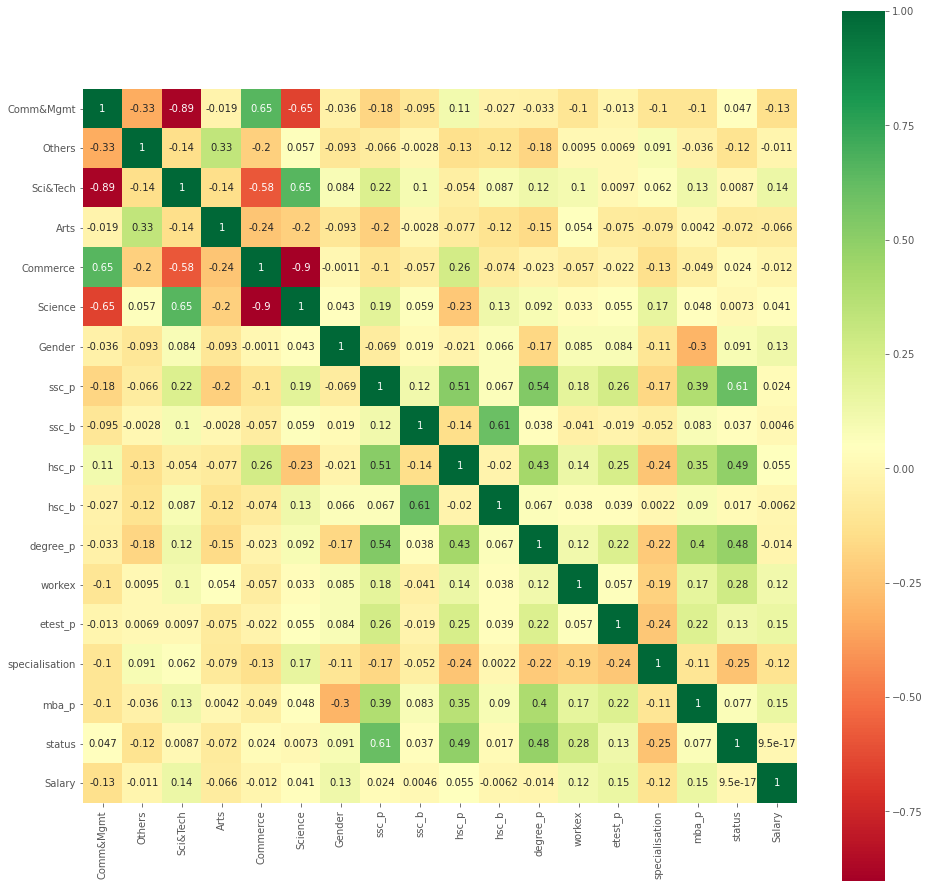

In [412]:
plt.figure(figsize=(16,16))
p=sb.heatmap(df_final.corr(), annot=True,cmap='RdYlGn',square=True)

Ahora visualizo la distribución de las variables que tengan mayor correlación con el salario.
Debido a la correlación más alta, las variables 'Sci&Tech', 'Gender', 'workex','etest_p', 'mba_p'son las más signitificativas para la predicción del salario.

C:\Users\luisn\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


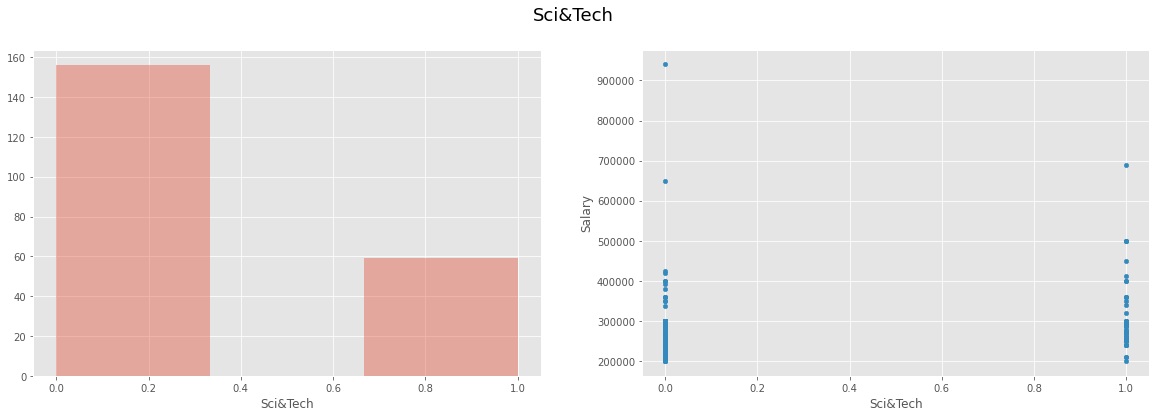

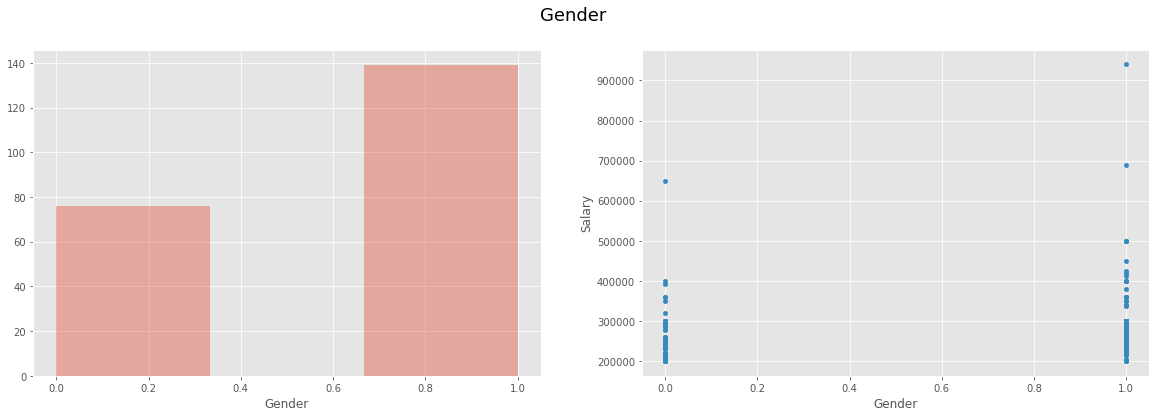

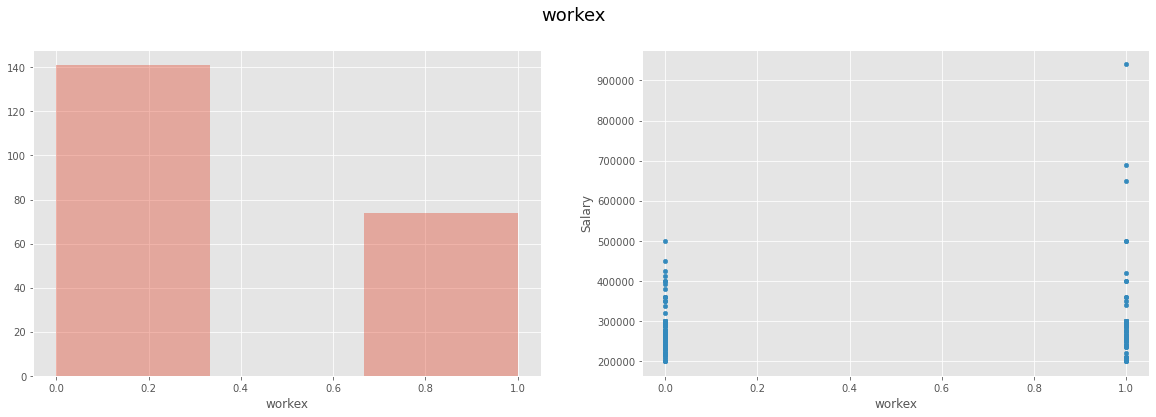

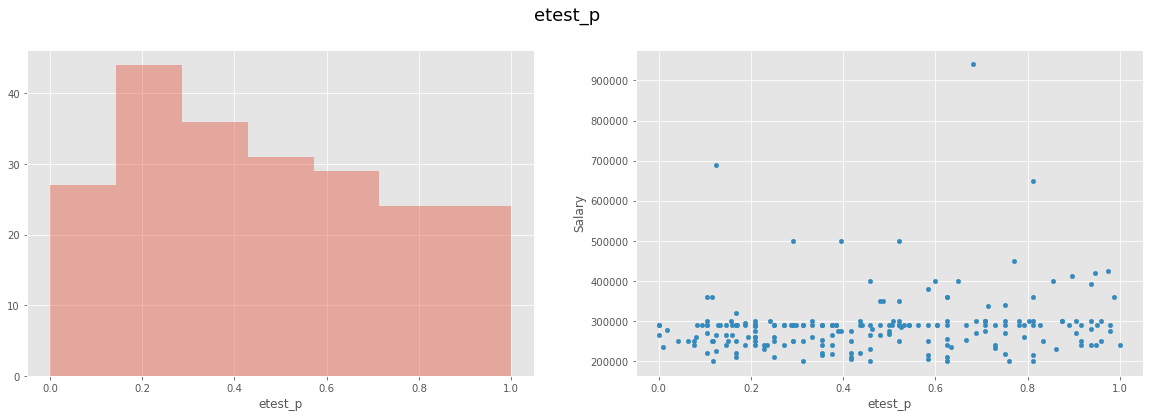

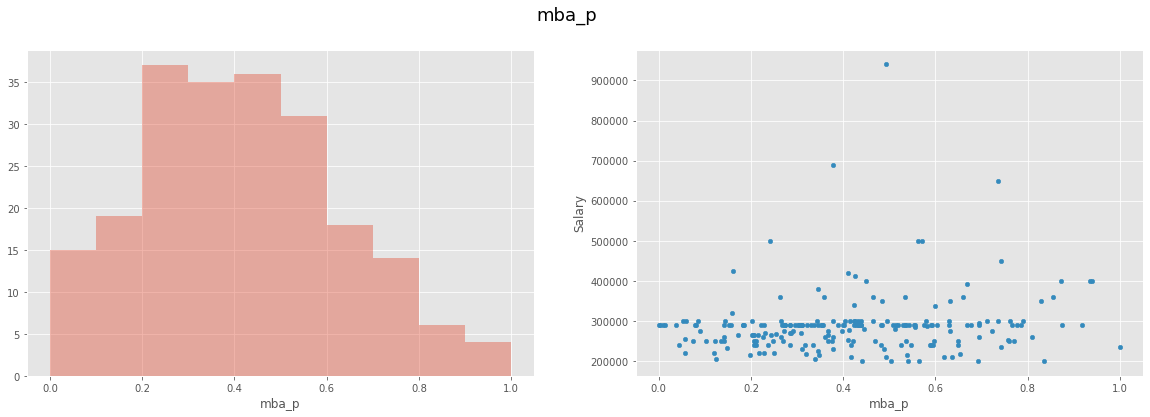

In [413]:
# Distribución de las variables
columnas = ['Sci&Tech', 'Gender', 'workex','etest_p', 'mba_p']
for col in columnas:
    fig, ax = plt.subplots(1, 2, figsize=(20, 6))
    fig.suptitle(col, fontsize=18)
    sb.distplot(df_final[col], ax=ax[0], kde=False)
    df_final[[col]+['Salary']].plot.scatter(x=col, y='Salary', ax=ax[1])
    plt.show()

# Sección 3 - Regresión


A continuación, aplica un modelo de Regresión o de Clasificación al dataset de los Salarios en Python.

---



Regresión utilizando las variables 'Sci&Tech', 'Gender', 'workex','etest_p', 'mba_p'

In [420]:
x = df_final[['Sci&Tech', 'Gender', 'workex','etest_p', 'mba_p']]
x.shape

(215, 5)

In [421]:
y = df_final[['Salary']]
y.shape

(215, 1)

In [422]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 29)

Defino mi algoritmo, entreno el modelo y realizpo la predicción del salario

In [438]:
modelo = linear_model.LinearRegression()
modelo.fit(X_train, y_train)
Y_pred = modelo.predict(X_test)

In [439]:
print('Score modelo: ', modelo.score(X_test, y_test))
print('Score modelo (train): ', modelo.score(X_train, y_train))
print('Mean squared error: ', np.mean((Y_pred - y_test)**2))
print('Coeficiente de determinación: ', r2_score(y_test, Y_pred))

Score modelo:  -0.003081752084886036
Score modelo (train):  0.09628361286312448
Mean squared error:  Salary    1.443621e+10
dtype: float64
Coeficiente de determinación:  -0.003081752084886036


In [440]:
print('Coeficiente: ', modelo.coef_)
print('Término independiente: ', modelo.intercept_)

Coeficiente:  [[24864.98529465 24574.23378221   279.87003193 16995.26885364
  27829.28639478]]
Término independiente:  [242425.70798222]


In [441]:
print("Reales:", y_test)
print("Prediciones", Y_pred)

Reales:             Salary
93   288655.405405
63   288655.405405
212  295000.000000
209  216000.000000
111  288655.405405
173  288655.405405
2    250000.000000
169  288655.405405
22   360000.000000
56   240000.000000
109  288655.405405
166  240000.000000
182  288655.405405
177  650000.000000
175  288655.405405
82   288655.405405
45   288655.405405
157  300000.000000
74   336000.000000
98   220000.000000
143  300000.000000
133  250000.000000
141  288655.405405
211  275000.000000
196  250000.000000
122  236000.000000
8    231000.000000
145  400000.000000
168  288655.405405
99   288655.405405
146  233000.000000
119  940000.000000
27   265000.000000
172  300000.000000
189  288655.405405
61   300000.000000
76   230000.000000
194  288655.405405
116  300000.000000
43   300000.000000
53   450000.000000
156  255000.000000
193  300000.000000
Prediciones [[279170.36213512]
 [282197.30749016]
 [289773.77445033]
 [278526.54446711]
 [305241.82136497]
 [281769.20304466]
 [282725.51975495]
 [308335.85

Regresión utilizando las variables 'Sci&Tech', 'Gender', 'workex','etest_p'

In [442]:
x = df_final[['Sci&Tech', 'Gender', 'workex','etest_p']]
x.shape

(215, 4)

In [443]:
y = df_final[['Salary']]
y.shape

(215, 1)

In [444]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 29)

In [445]:
modelo = linear_model.LinearRegression()
modelo.fit(X_train, y_train)
Y_pred = modelo.predict(X_test)

In [452]:
print('Score modelo: ', modelo.score(X_test, y_test))
print('Score modelo (train): ', modelo.score(X_train, y_train))
print('Mean squared error: ', np.mean((Y_pred - y_test)**2))
print('Coeficiente de determinación: ', r2_score(y_test, Y_pred))

Score modelo:  -0.020460982215362744
Score modelo (train):  0.0887214903755934
Mean squared error:  Salary    1.468633e+10
dtype: float64
Coeficiente de determinación:  -0.020460982215362744


In [353]:
print('Coeficiente: ', modelo.coef_)
print('Término independiente: ', modelo.intercept_)

Coeficiente:  [[26994.00690412 20061.3046582   2959.93992957 23183.23400723]]
Término independiente:  [252717.00758965]


In [356]:
print("Reales:", y_test)
print("Prediciones", Y_pred)

Reales:             Salary
93   288655.405405
63   288655.405405
212  295000.000000
209  216000.000000
111  288655.405405
173  288655.405405
2    250000.000000
169  288655.405405
22   360000.000000
56   240000.000000
109  288655.405405
166  240000.000000
182  288655.405405
177  650000.000000
175  288655.405405
82   288655.405405
45   288655.405405
157  300000.000000
74   336000.000000
98   220000.000000
143  300000.000000
133  250000.000000
141  288655.405405
211  275000.000000
196  250000.000000
122  236000.000000
8    231000.000000
145  400000.000000
168  288655.405405
99   288655.405405
146  233000.000000
119  940000.000000
27   265000.000000
172  300000.000000
189  288655.405405
61   300000.000000
76   230000.000000
194  288655.405405
116  300000.000000
43   300000.000000
53   450000.000000
156  255000.000000
193  300000.000000
Prediciones [[283403.96116784]
 [281713.51702148]
 [280085.10855378]
 [280989.04095875]
 [304602.15957015]
 [287921.74320467]
 [284852.91329329]
 [301936.08

Regresión utilizando las variables 'Sci&Tech', 'Gender', 'workex'

In [357]:
x = df_final[['Sci&Tech', 'Gender', 'workex']]
x.shape

(215, 3)

In [358]:
y = df_final[['Salary']]
y.shape

(215, 1)

In [359]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 29)

In [361]:
modelo = linear_model.LinearRegression()
modelo.fit(X_train, y_train)
Y_pred = modelo.predict(X_test)

In [362]:
print('Score modelo: ', modelo.score(X_test, y_test))
print('Score modelo (train): ', modelo.score(X_train, y_train))
print('Mean squared error: ', np.mean((Y_pred - y_test)**2))
print('Coeficiente de determinación: ', r2_score(y_test, Y_pred))

Score modelo:  -0.04346607306720229
Score modelo (train):  0.07776831709552667
Mean squared error:  Salary    1.501741e+10
dtype: float64
Coeficiente de determinación:  -0.04346607306720229


In [363]:
print('Coeficiente: ', modelo.coef_)
print('Término independiente: ', modelo.intercept_)

Coeficiente:  [[27756.44896931 20842.16129621  3375.29834067]]
Término independiente:  [262308.84960647]


In [364]:
print("Reales:", y_test)
print("Prediciones", Y_pred)

Reales:             Salary
93   288655.405405
63   288655.405405
212  295000.000000
209  216000.000000
111  288655.405405
173  288655.405405
2    250000.000000
169  288655.405405
22   360000.000000
56   240000.000000
109  288655.405405
166  240000.000000
182  288655.405405
177  650000.000000
175  288655.405405
82   288655.405405
45   288655.405405
157  300000.000000
74   336000.000000
98   220000.000000
143  300000.000000
133  250000.000000
141  288655.405405
211  275000.000000
196  250000.000000
122  236000.000000
8    231000.000000
145  400000.000000
168  288655.405405
99   288655.405405
146  233000.000000
119  940000.000000
27   265000.000000
172  300000.000000
189  288655.405405
61   300000.000000
76   230000.000000
194  288655.405405
116  300000.000000
43   300000.000000
53   450000.000000
156  255000.000000
193  300000.000000
Prediciones [[283151.01090268]
 [283151.01090268]
 [286526.30924336]
 [283151.01090268]
 [310907.45987199]
 [290065.29857578]
 [283151.01090268]
 [310907.45

Regresión utilizando las variables 'Sci&Tech', 'Gender'

In [365]:
x = df_final[['Sci&Tech', 'Gender']]
x.shape

(215, 2)

In [366]:
y = df_final[['Salary']]
y.shape

(215, 1)

In [369]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 29)

In [370]:
modelo = linear_model.LinearRegression()
modelo.fit(X_train, y_train)
Y_pred = modelo.predict(X_test)

In [371]:
print('Score modelo: ', modelo.score(X_test, y_test))
print('Score modelo (train): ', modelo.score(X_train, y_train))
print('Mean squared error: ', np.mean((Y_pred - y_test)**2))
print('Coeficiente de determinación: ', r2_score(y_test, Y_pred))

Score modelo:  -0.050084389060207846
Score modelo (train):  0.07709958449617871
Mean squared error:  Salary    1.511266e+10
dtype: float64
Coeficiente de determinación:  -0.050084389060207846


In [372]:
print('Coeficiente: ', modelo.coef_)
print('Término independiente: ', modelo.intercept_)

Coeficiente:  [[28282.48751544 21243.63002832]]
Término independiente:  [263117.80158354]


In [373]:
print("Reales:", y_test)
print("Prediciones", Y_pred)

Reales:             Salary
93   288655.405405
63   288655.405405
212  295000.000000
209  216000.000000
111  288655.405405
173  288655.405405
2    250000.000000
169  288655.405405
22   360000.000000
56   240000.000000
109  288655.405405
166  240000.000000
182  288655.405405
177  650000.000000
175  288655.405405
82   288655.405405
45   288655.405405
157  300000.000000
74   336000.000000
98   220000.000000
143  300000.000000
133  250000.000000
141  288655.405405
211  275000.000000
196  250000.000000
122  236000.000000
8    231000.000000
145  400000.000000
168  288655.405405
99   288655.405405
146  233000.000000
119  940000.000000
27   265000.000000
172  300000.000000
189  288655.405405
61   300000.000000
76   230000.000000
194  288655.405405
116  300000.000000
43   300000.000000
53   450000.000000
156  255000.000000
193  300000.000000
Prediciones [[284361.43161186]
 [284361.43161186]
 [284361.43161186]
 [284361.43161186]
 [312643.9191273 ]
 [291400.28909898]
 [284361.43161186]
 [312643.91

In [454]:
X = df_final.Gender
y = df_final.Salary
print("Shape of X :", X.shape, "Shape of y:", y.shape)

Shape of X : (215,) Shape of y: (215,)


In [455]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=29)

In [456]:
X_train = np.array(X_train).reshape(-1,1)
y_train = np.array(y_train).reshape(-1,1)
X_test = np.array(X_test).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)

X_train.shape

(172, 1)

In [457]:
modelo = linear_model.LinearRegression()

In [458]:
modelo.fit(X_train, y_train)

LinearRegression()

In [459]:
y_pred = modelo.predict(X_test)

In [463]:
print('Coeficientes: \n\tb1 =', modelo.coef_, 'a =', modelo.intercept_)
print('Mean squared error (MSE): ', mean_squared_error(y_test, y_pred))
print('Coeficiente de determinación: ', r2_score(y_test, y_pred))
print('Score del modelo (train): ', modelo.score(X_train, y_train))
print('Score del modelo (test): ', modelo.score(X_test, y_test))

Coeficientes: 
	b1 = [[23782.42393337]] a = [269117.11711712]
Mean squared error (MSE):  15002101996.154448
Coeficiente de determinación:  -0.04240223237082441
Score del modelo (train):  0.035689888065680075
Score del modelo (test):  -0.04240223237082441
